# Oversampling with Data Augmentation

The following code oversamples images from one class of the training set using data augmentation. In case you want to run this on Google Drive (recommended), you will need the following cell, which must be customized taking into account the path in which you save this notebook.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/TC3007C/Reto"
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TC3007C/Reto
/content/drive/MyDrive/TC3007C/Reto


We will need some modules for thing to work out: `ImageDataGenerator`, `image` and `sample`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from random import sample

The `base_dir` will be the directory in which you have your data. Notice that it is not the same directory in which you have your notebook:

Notebook path: `/content/drive/MyDrive/TC3007C/Reto`

Train set path: `/content/drive/MyDrive/TC3007C/Reto/Data`

Now you must specify the path of the training set, which will be saved in the `train_dir` variable. Also, an instance of `ImageDataGenerator` must be created.

In [3]:
base_dir = 'Data'
train_dir = os.path.join(base_dir,'train_test')

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

For visualization purposes, let us ilustrate the oversampling process with one image from the `430` class. In this case, we will generate four extra samples from one image with the `flow` method. Notice that we have to interrupt the `for` loop because the `flow` method will generate extra samples indefinitely.

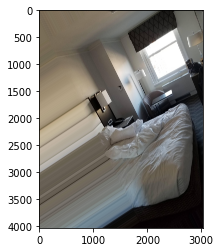

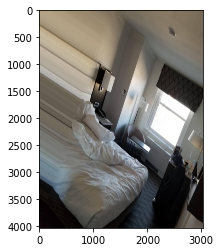

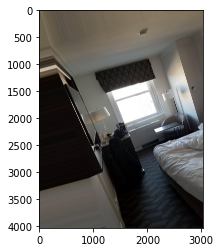

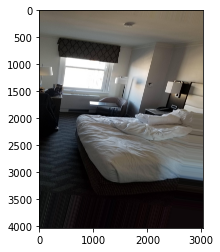

In [4]:
temp_dir = os.path.join(train_dir, '430')

img_names = [os.path.join(temp_dir, name) for name in os.listdir(temp_dir)]
   
img_path = img_names[0]
img = tf.keras.preprocessing.image.load_img(img_path)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0

for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In the following cell the images of the class `430` will be oversampled following the process shown in the previous cell. This will be done in a way in which the extra samples plus the number of images in said folder will be equal to `target_number`. Speaking of `target_number`, this amount of samples will be attained as long as `target_number` is at least twice the number of images of the class that will be oversampled.

In [5]:
target_number = 30
temp_dir = os.path.join(train_dir, '430')

img_names = [os.path.join(temp_dir, name) for name in os.listdir(temp_dir)]
remainder = sample(img_names, k=target_number % len(img_names))   
target_per_img = target_number // len(img_names) - 1
i, j, k = 0, 0, 0

for img_path in img_names:
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)

    for batch in train_datagen.flow(img_array, batch_size=1):
        temp = tf.keras.preprocessing.image.array_to_img(batch[0])
        zeros = 9 - len(str(i + 1))
        name = zeros * '0' + str(i + 1)
        name = os.path.join(temp_dir, name + '.jpg')
        temp.save(name)
        i += 1
        if img_path in remainder:
            j += 1
            if j == (target_per_img + 1):
                j = 0
                break
        elif img_path not in remainder:
            k += 1
            if k == target_per_img:
                k = 0
                break